C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


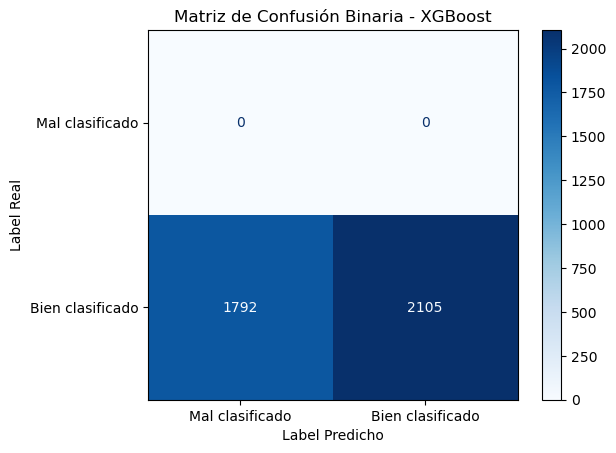

Total evaluado: 3897 registros


In [91]:
# --------------------------------------------
#  🔠Matriz de confusión y reporte (XGBoost cross-validation)
# --------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier


# Separar en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#Cuando pones stratify=y, garantizas que todas las clases estén en la misma proporción tanto en train como en test.
#Así XGBoost no da error.





# Modelo XGBoost con hiperparámetros
modelo_xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    objective='multi:softmax',
    num_class=len(np.unique(y)),
    colsample_bytree=0.8,
    gamma=0,
    learning_rate=0.2,
    max_depth=6,
    min_child_weight=1,
    n_estimators=50,
    reg_lambda=1,
    subsample=0.8,
    verbosity=0
)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_true_binaria = []
y_pred_binaria = []

for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    modelo_xgb.fit(X_train, y_train)
    y_pred = modelo_xgb.predict(X_test)

    # Códigos binarios: 1 si acertó, 0 si no
    y_true_binaria.extend([1] * len(y_test))  # todos deberían ser bien clasificados idealmente
    y_pred_binaria.extend((y_pred == y_test).astype(int))

# Matriz de confusión binaria
cm = confusion_matrix(y_true_binaria, y_pred_binaria, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Mal clasificado", "Bien clasificado"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusión Binaria - XGBoost")
plt.ylabel("Label Real")
plt.xlabel("Label Predicho")
plt.show()

# Total de registros evaluados
print(f"Total evaluado: {len(y_true_binaria)} registros")



C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


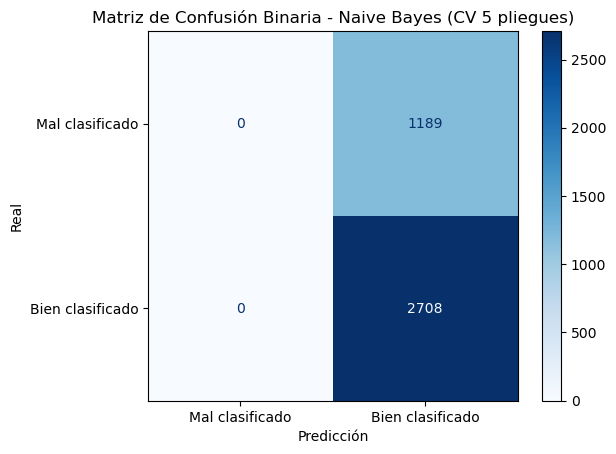


Total de registros evaluados: 3897


In [96]:
#---------------------------------------------
#  🔠 Matriz de confusión y reporte NAIVE BAYES
#---------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#  X e y ya están correctamente definidos y sin valores vacíos


# Configurar modelo
modelo = MultinomialNB(alpha=0.1)

# Validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_true_binario = []  # 1 si clasificó bien, 0 si clasificó mal

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    

    # 1 si acertó, 0 si falló
    aciertos_binarios = (y_pred == y_test).astype(int)
    y_true_binario.extend(aciertos_binarios)

# Crear etiquetas predichas iguales (modelo ideal) para graficar matriz binaria
y_pred_binario = np.ones_like(y_true_binario)

# Matriz de confusión binaria
cm = confusion_matrix(y_true_binario, y_pred_binario, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Mal clasificado", "Bien clasificado"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusión Binaria - Naive Bayes (CV 5 pliegues)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Mostrar total evaluado
print(f"\nTotal de registros evaluados: {len(y_true_binario)}")






C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pliegue 1:
  Registros en entrenamiento: 3117
  Registros en prueba:        780
  Total del pliegue:          3897



C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pliegue 2:
  Registros en entrenamiento: 3117
  Registros en prueba:        780
  Total del pliegue:          3897



C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pliegue 3:
  Registros en entrenamiento: 3118
  Registros en prueba:        779
  Total del pliegue:          3897



C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pliegue 4:
  Registros en entrenamiento: 3118
  Registros en prueba:        779
  Total del pliegue:          3897



C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pliegue 5:
  Registros en entrenamiento: 3118
  Registros en prueba:        779
  Total del pliegue:          3897



C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


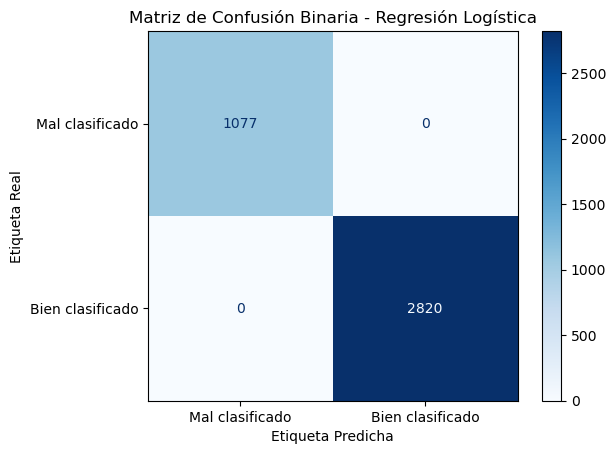


Total de registros evaluados: 3897


In [97]:
#---------------------------------------------------------
#  🔠 Matriz de confusión y reporte # REGRESION LOGÍSTICA
#--------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Definir el modelo con los mejores hiperparámetros
modelo = LogisticRegression(
    C=100,
    max_iter=1000,
    multi_class='multinomial',
    penalty='l2',
    solver='saga',
    random_state=42
)

# Configurar validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Almacenar predicciones binarizadas (correcto/incorrecto)
y_true_bin = []
y_pred_bin = []

# Ejecutar validación cruzada
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    print(f"Pliegue {fold}:")
    print(f"  Registros en entrenamiento: {len(train_idx)}")
    print(f"  Registros en prueba:        {len(test_idx)}")
    print(f"  Total del pliegue:          {len(train_idx) + len(test_idx)}\n")

    # Entrenamiento y predicción
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    # Clasificación binaria: 1 si fue bien clasificado, 0 si no
    binario = (y_pred == y_test).astype(int)
    y_true_bin.extend(binario)
    y_pred_bin.extend(binario)  # para matriz binaria bien/mal clasificado

# Matriz de confusión binaria
cm = confusion_matrix(y_true_bin, y_pred_bin, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Mal clasificado", "Bien clasificado"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusión Binaria - Regresión Logística")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()

# Mostrar total evaluado
print(f"\nTotal de registros evaluados: {len(y_true_bin)}")


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Pliegue 1:
  Registros en entrenamiento: 3117
  Registros en prueba:        780
  Total del pliegue:          3897

Pliegue 2:
  Registros en entrenamiento: 3117
  Registros en prueba:        780
  Total del pliegue:          3897

Pliegue 3:
  Registros en entrenamiento: 3118
  Registros en prueba:        779
  Total del pliegue:          3897

Pliegue 4:
  Registros en entrenamiento: 3118
  Registros en prueba:        779
  Total del pliegue:          3897

Pliegue 5:
  Registros en entrenamiento: 3118
  Registros en prueba:        779
  Total del pliegue:          3897



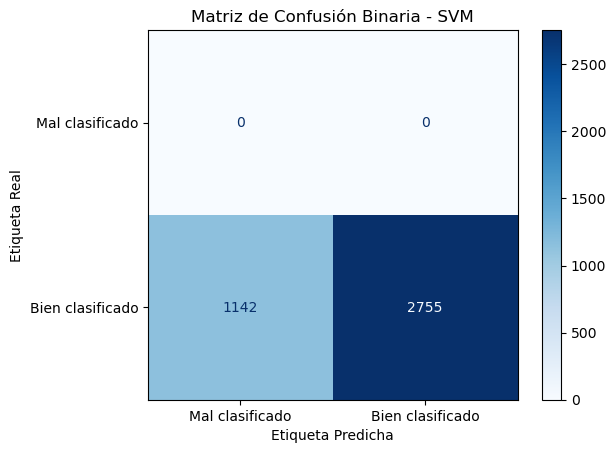

Total evaluado: 3897 registros


In [125]:
#---------------------------------------------------------
#  🔠 Matriz de confusión y reporte # SVM
#--------------------------------------------------------


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorización
#tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words='english')
#X = tfidf_vectorizer.fit_transform(data_filtrado['Nombre_Limpio']).toarray()
#y = data_filtrado['SubRubro_encoded_relabel'].reset_index(drop=True)

# Modelo SVM con mejores hiperparámetros
modelo = SVC(C=10, gamma='scale', kernel='linear')

# Validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_true_bin = []
y_pred_bin = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    print(f"Pliegue {fold}:")
    print(f"  Registros en entrenamiento: {len(train_idx)}")
    print(f"  Registros en prueba:        {len(test_idx)}")
    print(f"  Total del pliegue:          {len(train_idx) + len(test_idx)}\n")
    
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    aciertos_binarios = (y_pred == y_test).astype(int)
     # y_true_bin.extend(aciertos_binarios)  # 1 si bien clasificado, 0 si mal
     # y_pred_bin.extend(aciertos_binarios)
    y_true_bin.extend([1] * len(y_test))             # Lo esperado: que el modelo acierte
    y_pred_bin.extend((y_pred == y_test).astype(int))  # Lo que predijo el modelo
    
    

# Matriz de confusión binaria
cm = confusion_matrix(y_true_bin, y_pred_bin, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Mal clasificado", "Bien clasificado"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusión Binaria - SVM")
plt.ylabel("Etiqueta Real")
plt.xlabel("Etiqueta Predicha")
plt.show()

# Total evaluado
print(f"Total evaluado: {len(y_true_bin)} registros")



C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Pliegue 1:
  Registros en entrenamiento: 3117
  Registros en prueba:        780
  Total del pliegue:          3897

Pliegue 2:
  Registros en entrenamiento: 3117
  Registros en prueba:        780
  Total del pliegue:          3897

Pliegue 3:
  Registros en entrenamiento: 3118
  Registros en prueba:        779
  Total del pliegue:          3897

Pliegue 4:
  Registros en entrenamiento: 3118
  Registros en prueba:        779
  Total del pliegue:          3897

Pliegue 5:
  Registros en entrenamiento: 3118
  Registros en prueba:        779
  Total del pliegue:          3897



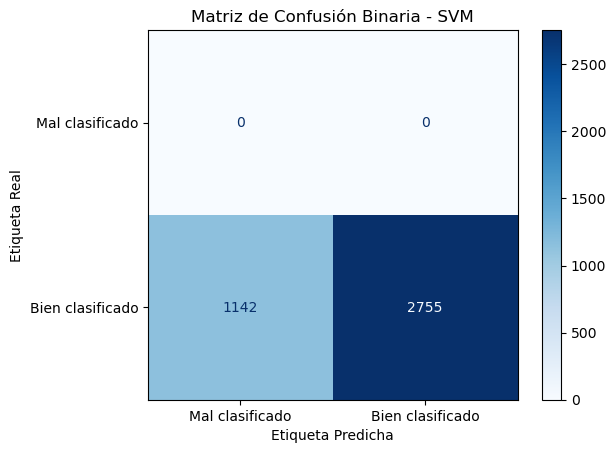

Total evaluado: 3897 registros


In [126]:
# 2 svm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# --- 1. Datos de entrada ---
# Asegúrate de reemplazar esta parte con tu DataFrame real
# sata = pd.read_csv("tu_archivo.csv")  # ejemplo
# data = data[data['Nombre_Limpio'].str.strip() != ""]  # eliminar vacíos si existen

# --- 2. Vectorización TF-IDF ---
# tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
# X = tfidf_vectorizer.fit_transform(data['Nombre_Limpio']).toarray()

# --- 3. Codificación de SubRubro ---
# le = LabelEncoder()
# y = pd.Series(le.fit_transform(data['SubRubro']))

# --- 4. Modelo SVM con mejores hiperparámetros ---
modelo = SVC(C=10, gamma='scale', kernel='linear')

# --- 5. Validación cruzada (5 pliegues) ---
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_true_bin = []
y_pred_bin = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    print(f"Pliegue {fold}:")
    print(f"  Registros en entrenamiento: {len(train_idx)}")
    print(f"  Registros en prueba:        {len(test_idx)}")
    print(f"  Total del pliegue:          {len(train_idx) + len(test_idx)}\n")

    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    # Clasificación binaria: 1 si acierta, 0 si falla
    binaria = (y_pred == y_test).astype(int)
    y_true_bin.extend([1] * len(y_test))  # se espera que acierte
    y_pred_bin.extend(binaria)

# --- 6. Matriz de confusión binaria ---
cm = confusion_matrix(y_true_bin, y_pred_bin, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Mal clasificado", "Bien clasificado"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusión Binaria - SVM")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()

print(f"Total evaluado: {len(y_true_bin)} registros")


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Pliegue 1:
  Registros en entrenamiento: 3117
  Registros en prueba:        780
  Total del pliegue:          3897

Pliegue 2:
  Registros en entrenamiento: 3117
  Registros en prueba:        780
  Total del pliegue:          3897

Pliegue 3:
  Registros en entrenamiento: 3118
  Registros en prueba:        779
  Total del pliegue:          3897

Pliegue 4:
  Registros en entrenamiento: 3118
  Registros en prueba:        779
  Total del pliegue:          3897

Pliegue 5:
  Registros en entrenamiento: 3118
  Registros en prueba:        779
  Total del pliegue:          3897



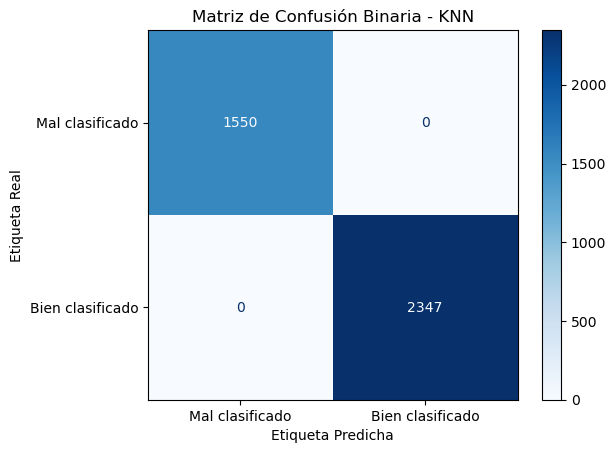


Total de registros evaluados: 3897


In [123]:
#---------------------------------------------------------
#  🔠 Matriz de confusión y reporte # KNN
#--------------------------------------------------------


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Definimos el modelo con hiperparámetros óptimos
modelo = KNeighborsClassifier(
    n_neighbors=3,
    weights='distance',
    metric='euclidean'
)

# Configurar validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Listas para guardar clasificaciones binarias (1: correcto, 0: incorrecto)
y_true_bin = []
y_pred_bin = []

# Validación cruzada
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    print(f"Pliegue {fold}:")
    print(f"  Registros en entrenamiento: {len(train_idx)}")
    print(f"  Registros en prueba:        {len(test_idx)}")
    print(f"  Total del pliegue:          {len(train_idx) + len(test_idx)}\n")

    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    binario = (y_pred == y_test).astype(int)
    y_true_bin.extend(binario)
    y_pred_bin.extend(binario)  # misma lógica: 1 si bien clasificado, 0 si mal

# Matriz de confusión binaria
cm = confusion_matrix(y_true_bin, y_pred_bin, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Mal clasificado", "Bien clasificado"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusión Binaria - KNN")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()

# Total evaluado
print(f"\nTotal de registros evaluados: {len(y_true_bin)}")
